<a href="https://colab.research.google.com/github/SandhyaKshirsagar/ML-Practice-Projects/blob/main/KNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##K-Nearest Neighbour Algorithm for ML

1. Its based on Supervised learning technique
2. It is used when the target feature is of categorical data
3. It assumes the similarity between the new data and available data and puts the new data in the category that's most similar to the available data
4. It can be used for Regression and for classificiation. Mostly used for classification problems.
5. Its a non-perametric algorithm, does not make any assumptions on data
6. Also called as Lazy Learner Algorithm: It does not learn from training set immediately (in the .fit() method), just stores the dataset. At the time of classification (.predict() method) it performs an action on dataset

###Working of KNN:
1. Select the number k of the neighbours
2. Calculate the Euclidean distance (Pythogorean Distance) of k.

    Formula: D = square root of (x2-x1)^2 + (y2-y1)^2
3. Take the K nearest neighbours as per the calculated Euclidean Distance
4. Out of these k nearest neighbours count the number of data points in each category
5. Assign the new data point to the category for which the neighbour count is maximum

###Points to remember:
1. The most prefered or default value for k is 5
2. Rescale Data: KNN performs much better if all the data has same scale. Normalizing data to the range[0,1] is a good idea. If the data has a Gaussian distribution then its a good idea to standardize your data.
3. Address missing data: Missing data will mean that the distance between samples can not be calculated. These samples could be excluded or the missing values could be imputed.
4. Lower Dimensionality: KNN is suited for lower dimensional data. You can try it on high dimensional data (hundreds or thousands of input variables) but be aware that it may not perform as well as other techniques. KNN can benefit from feature selection that reduces the dimensionality of the input feature space.
5. Use pickle module to save any ML model to a file. The file extension should be " .SAV "

##Classified Data Case Study

###Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###Get the data

Set index_col=0 to set the first column as index

In the data provided, the columns names are classified. So we do not know what type of data this is. The target column is mentioned.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/KNN Algo/Classified Data", index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


<Axes: >

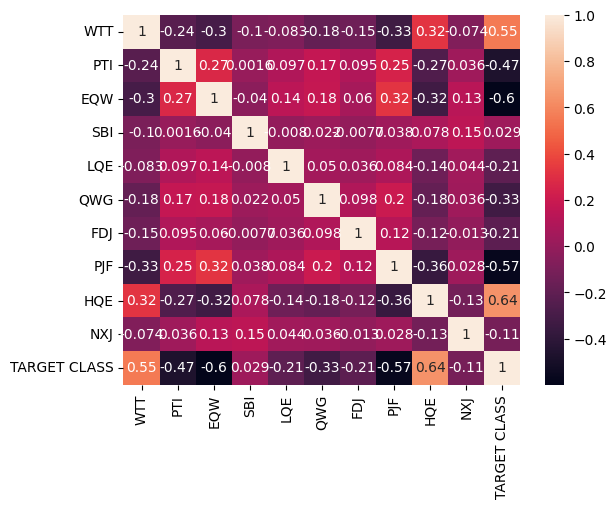

In [ ]:
sns.heatmap(df.corr(), annot=True)

###Standardization of variables

Its always preferred to perform standardization of variables before performing KNN. As the KNN classifier predicts the category of a given test observation by calculating the distance of the variables and identifying the nearest to it, the scale of the variables matters.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [ ]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


###Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df['TARGET CLASS'], test_size = 0.30)

In [ ]:
X_train.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
38,1.180237,-0.998772,0.647628,-0.909644,0.948623,0.109881,0.298133,-1.132479,1.771808,-1.084851
189,-0.439624,0.025345,1.825291,0.425666,0.375343,1.445270,-0.606923,1.799313,-0.551483,0.773908
435,0.888357,0.802441,-0.802459,0.036219,-0.411028,-1.040641,-1.206336,0.071199,-1.351282,0.933751
963,0.610360,1.144443,-0.043199,-1.187144,-1.503455,0.144392,0.123156,-0.454390,0.821782,0.195647
505,-1.190680,1.198876,0.687178,-0.478112,-1.883764,1.723373,0.074604,0.359037,-1.631253,-1.118286


In [ ]:
X_test.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
108,0.276917,-1.383174,-1.172081,-0.654887,0.674635,0.126305,-1.143111,-1.125908,0.757548,-0.163855
928,0.302173,1.235072,-0.619607,-1.419688,-0.061359,0.657927,0.028730,-1.467781,0.346407,-0.456279
158,-1.611532,-1.303256,2.248590,2.096182,0.442626,2.080619,-0.542616,0.234344,-1.726249,-1.836112
925,-0.655043,1.547393,1.169481,-0.616656,-0.990060,-0.457587,0.388207,0.533962,-1.011521,0.864646
122,0.885407,-0.918213,-0.343628,-1.561266,-1.634646,-0.661034,-0.652302,0.014525,-0.225741,0.271420


In [ ]:
y_train.head()

38     1
189    0
435    1
963    1
505    0
Name: TARGET CLASS, dtype: int64

In [ ]:
y_test.head()

108    1
928    1
158    0
925    0
122    1
Name: TARGET CLASS, dtype: int64

In [ ]:
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_train = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (700, 10)
Shape of X_train = (300, 10)
Shape of y_train = (700,)
Shape of y_test = (300,)


###Using KNN

Starting with k=1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
pred[:5]

array([1, 1, 0, 0, 1])

###Predictions and Evaluations

Evaluating our KNN model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(confusion_matrix(y_test,pred))

[[131  22]
 [ 12 135]]


In [ ]:
print(accuracy_score(y_test,pred))

0.8866666666666667


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       153
           1       0.86      0.92      0.89       147

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



Macro average represents the arithmetic mean between the f1_scores of the two categories, such that both scores have the same importance:

Macro avg = (f1_0 + f1_1) / 2

Micro average takes into account how many samples there are per category (the greater the support, the more important that category's f1_score):

Micro avg = (f1_0 x support_0 + f1_1 x support_1) / (support_0 + support_1)

###Choosing K value

Using elbow method to pick a good k value

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)

In [ ]:
#Checking different values of K

error_rate = []

for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test)) #when pred not equal to y_test, get the mean of it and append to error_rate list

In [ ]:
print(error_rate)

[0.11333333333333333, 0.10333333333333333, 0.10666666666666667, 0.08666666666666667, 0.09, 0.08333333333333333, 0.08, 0.07333333333333333, 0.07666666666666666, 0.06333333333333334, 0.06333333333333334, 0.06333333333333334, 0.07, 0.07, 0.07, 0.07333333333333333, 0.07333333333333333, 0.07, 0.07333333333333333, 0.07666666666666666, 0.07333333333333333, 0.07, 0.08, 0.07333333333333333, 0.08, 0.07, 0.07333333333333333, 0.07333333333333333, 0.07, 0.07, 0.08, 0.07666666666666666, 0.07333333333333333, 0.07, 0.08333333333333333, 0.08, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08666666666666667, 0.08333333333333333, 0.09, 0.08, 0.08666666666666667, 0.09, 0.09333333333333334, 0.08666666666666667, 0.08666666666666667]


Text(0, 0.5, 'Error Rate')

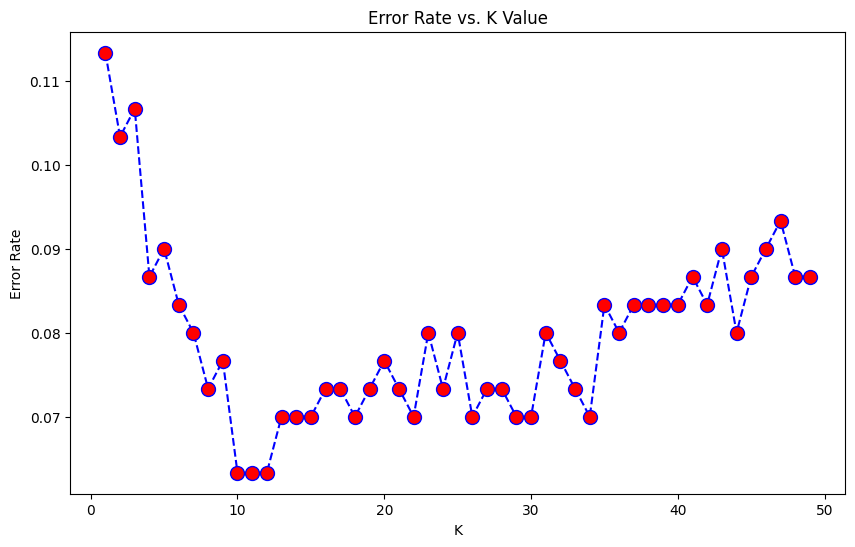

In [ ]:
#Plotting a graph between different k values and the error rates. To determine which k value to use

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The error rate is consistent between 0.07 to 0.08 for k 20 to 35

In [ ]:
#Using k = 23

knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

WITH K=23


[[133  20]
 [  4 143]]


              precision    recall  f1-score   support

           0       0.97      0.87      0.92       153
           1       0.88      0.97      0.92       147

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

0.92


In [ ]:
# using k= 31
knn = KNeighborsClassifier(n_neighbors=31)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=31')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

WITH K=31


[[132  21]
 [  3 144]]


              precision    recall  f1-score   support

           0       0.98      0.86      0.92       153
           1       0.87      0.98      0.92       147

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300

0.92


In [ ]:
#using k = 39
knn = KNeighborsClassifier(n_neighbors=39)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=39')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

WITH K=39


[[133  20]
 [  5 142]]


              precision    recall  f1-score   support

           0       0.96      0.87      0.91       153
           1       0.88      0.97      0.92       147

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

0.9166666666666666


We can use k=31 for our model as it gives the best result and accuracy rate

###Saving the model to a file

In [ ]:
#saving model
import pickle
pickle.dump(knn, open("knnmodel.sav", 'wb'))

In [ ]:
#reading model
knn_obj = pickle.load(open("knnmodel.sav", 'rb'))
knn_obj.predict(X_test)
